In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
from experiments import get_experiments_results
from env_var import EPIDEMIC, MAPPINGS, EXPERIMENTS

mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [2]:
# Simulation parameters
num_age_groups = EXPERIMENTS['num_age_groups']
num_ervas = EXPERIMENTS['num_ervas']
T = EXPERIMENTS['simulate_T']
init_vacc = EXPERIMENTS['init_vacc']
inc_mob = EXPERIMENTS['inc_mob']
u = EXPERIMENTS['vaccines_per_day']
r_experiments = EXPERIMENTS['r_effs']
t0 = EXPERIMENTS['t0']
e = EPIDEMIC['e']
strategies = EXPERIMENTS['strategies']

# Plot parameters
plot_interval = 15
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][num_age_groups]['names']
color_palette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#999999"]

In [3]:
all_results = get_experiments_results(num_age_groups=num_age_groups,
                                      num_ervas=num_ervas,
                                      init_vacc=init_vacc,
                                      strategies=strategies,
                                      u=u,
                                      T=T,
                                      r_experiments=r_experiments,
                                      t0=t0,
                                      e=e,
                                      inc_mob=inc_mob)

Beginning experiments.
Parameters:
Number of age ervas: 5.
Number of age groups: 9.
Number of vaccines per day: 30000.
rho: 42.269217817616585.
t0: 2021-04-18.
T: 115.
Vaccine efficacy (e): 0.7.
Rs to try: [0.75, 1.0, 1.25, 1.5, 2.0].
Initialize with vaccinated people: True.
Include mobility: True.
Strategies:
[([1, 0, 0], 'Pop only'), ([0, 0, 0], 'No vaccination'), ([0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 'Pop, Inf and Hosp'), ([0.5, 0, 0.5], 'Pop and Hosp'), ([0.5, 0.5, 0], 'Pop and Inf'), ([0, 0.5, 0.5], 'Hosp and Inf'), ([0, 0, 1], 'Hosp only'), ([0, 1, 0], 'Inf only'), (None, 'Optimal')].

Finished R: 0.75. Beta: 0.017743408530437054 1/5. Policy: Pop only. 1/9
Finished R: 0.75. Beta: 0.017743408530437054 1/5. Policy: No vaccination. 2/9
Finished R: 0.75. Beta: 0.017743408530437054 1/5. Policy: Pop, Inf and Hosp. 3/9
Finished R: 0.75. Beta: 0.017743408530437054 1/5. Policy: Pop and Hosp. 4/9
Finished R: 0.75. Beta: 0.017743408530437054 1/5. Policy: Pop and Inf

In [6]:
def plot_vaccination(ax, all_results, r, metric, t0, T, plot, labels):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    results_for_r = all_results[r]
    for label, results_all_metrics in results_for_r:
        if label == 'Optimal':
            metric_results = results_all_metrics[metric]

    num_ages, num_ervas, days = metric_results.shape
    if plot == 'age groups':
        assert num_ages == len(labels)
        
        results = metric_results.sum(axis=1)
        assert results.shape[0] == num_ages
    elif plot == 'ervas':
        assert num_ervas == len(labels)
        
        results = metric_results.sum(axis=0)
        assert results.shape[0] == num_ervas
    else:
        raise ValueError('Wrong thing to plot.')

    x = [begin + datetime.timedelta(days=day) for day in range(T)]
    
    assert results.shape[1] == T

    for label_i in range(len(labels)):
        ax.plot(x, results[label_i, :], label=labels[label_i])

    ax.set_xlabel('Date')
    ax.set_ylabel('Number of vaccinations')
    ax.set_title('Number of vaccinations per %s. R=%s' % (plot, r))

    ax.legend()

    return ax

# R = 0.75

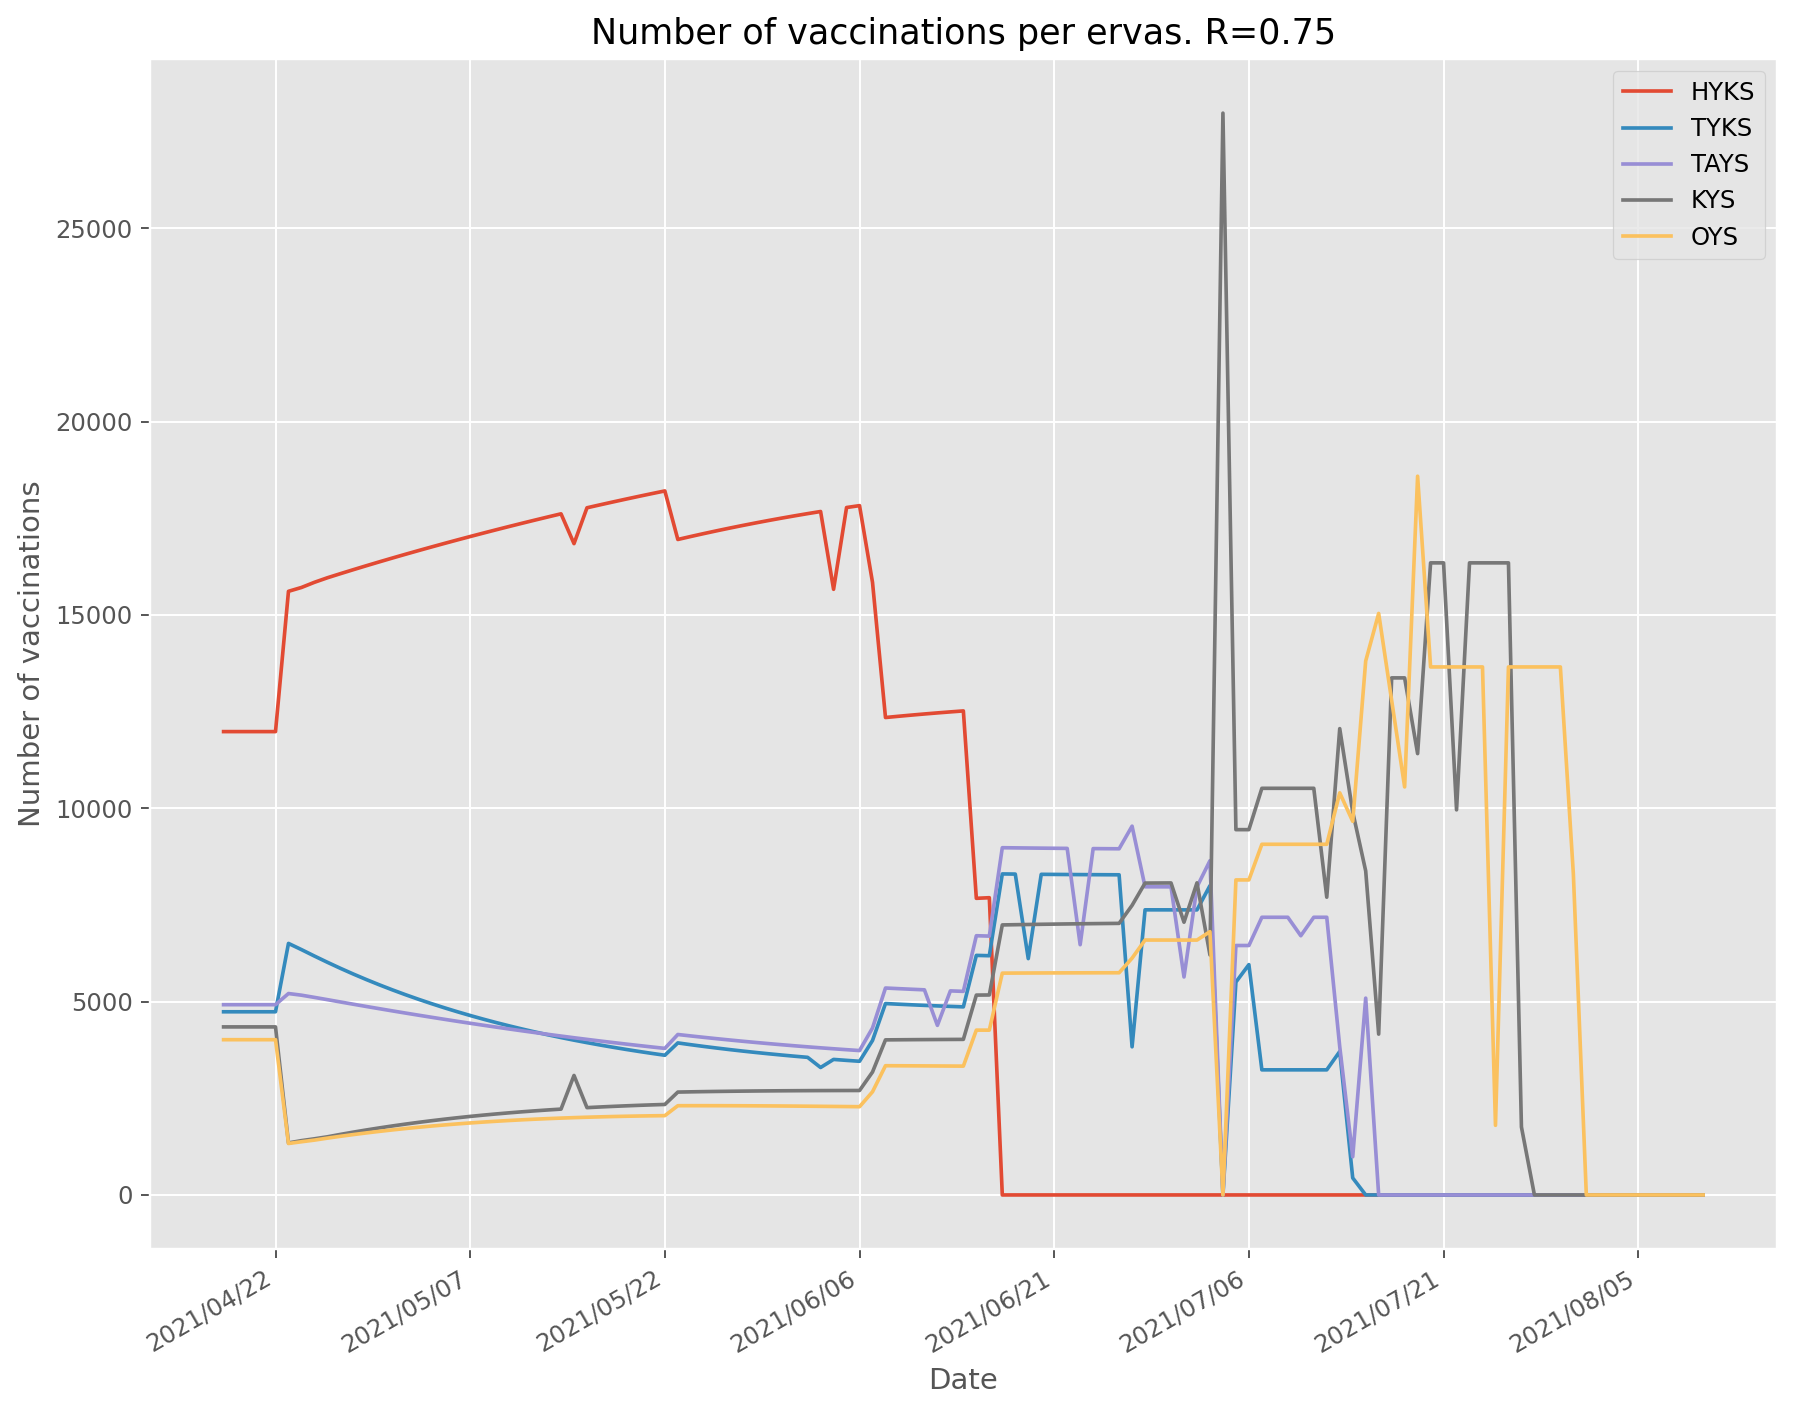

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_vaccination(ax, all_results=all_results ,r=r_experiments[0],
                      metric='vaccinations', t0=t0, T=T, plot='ervas', labels=ervas_labels)

fig.autofmt_xdate()

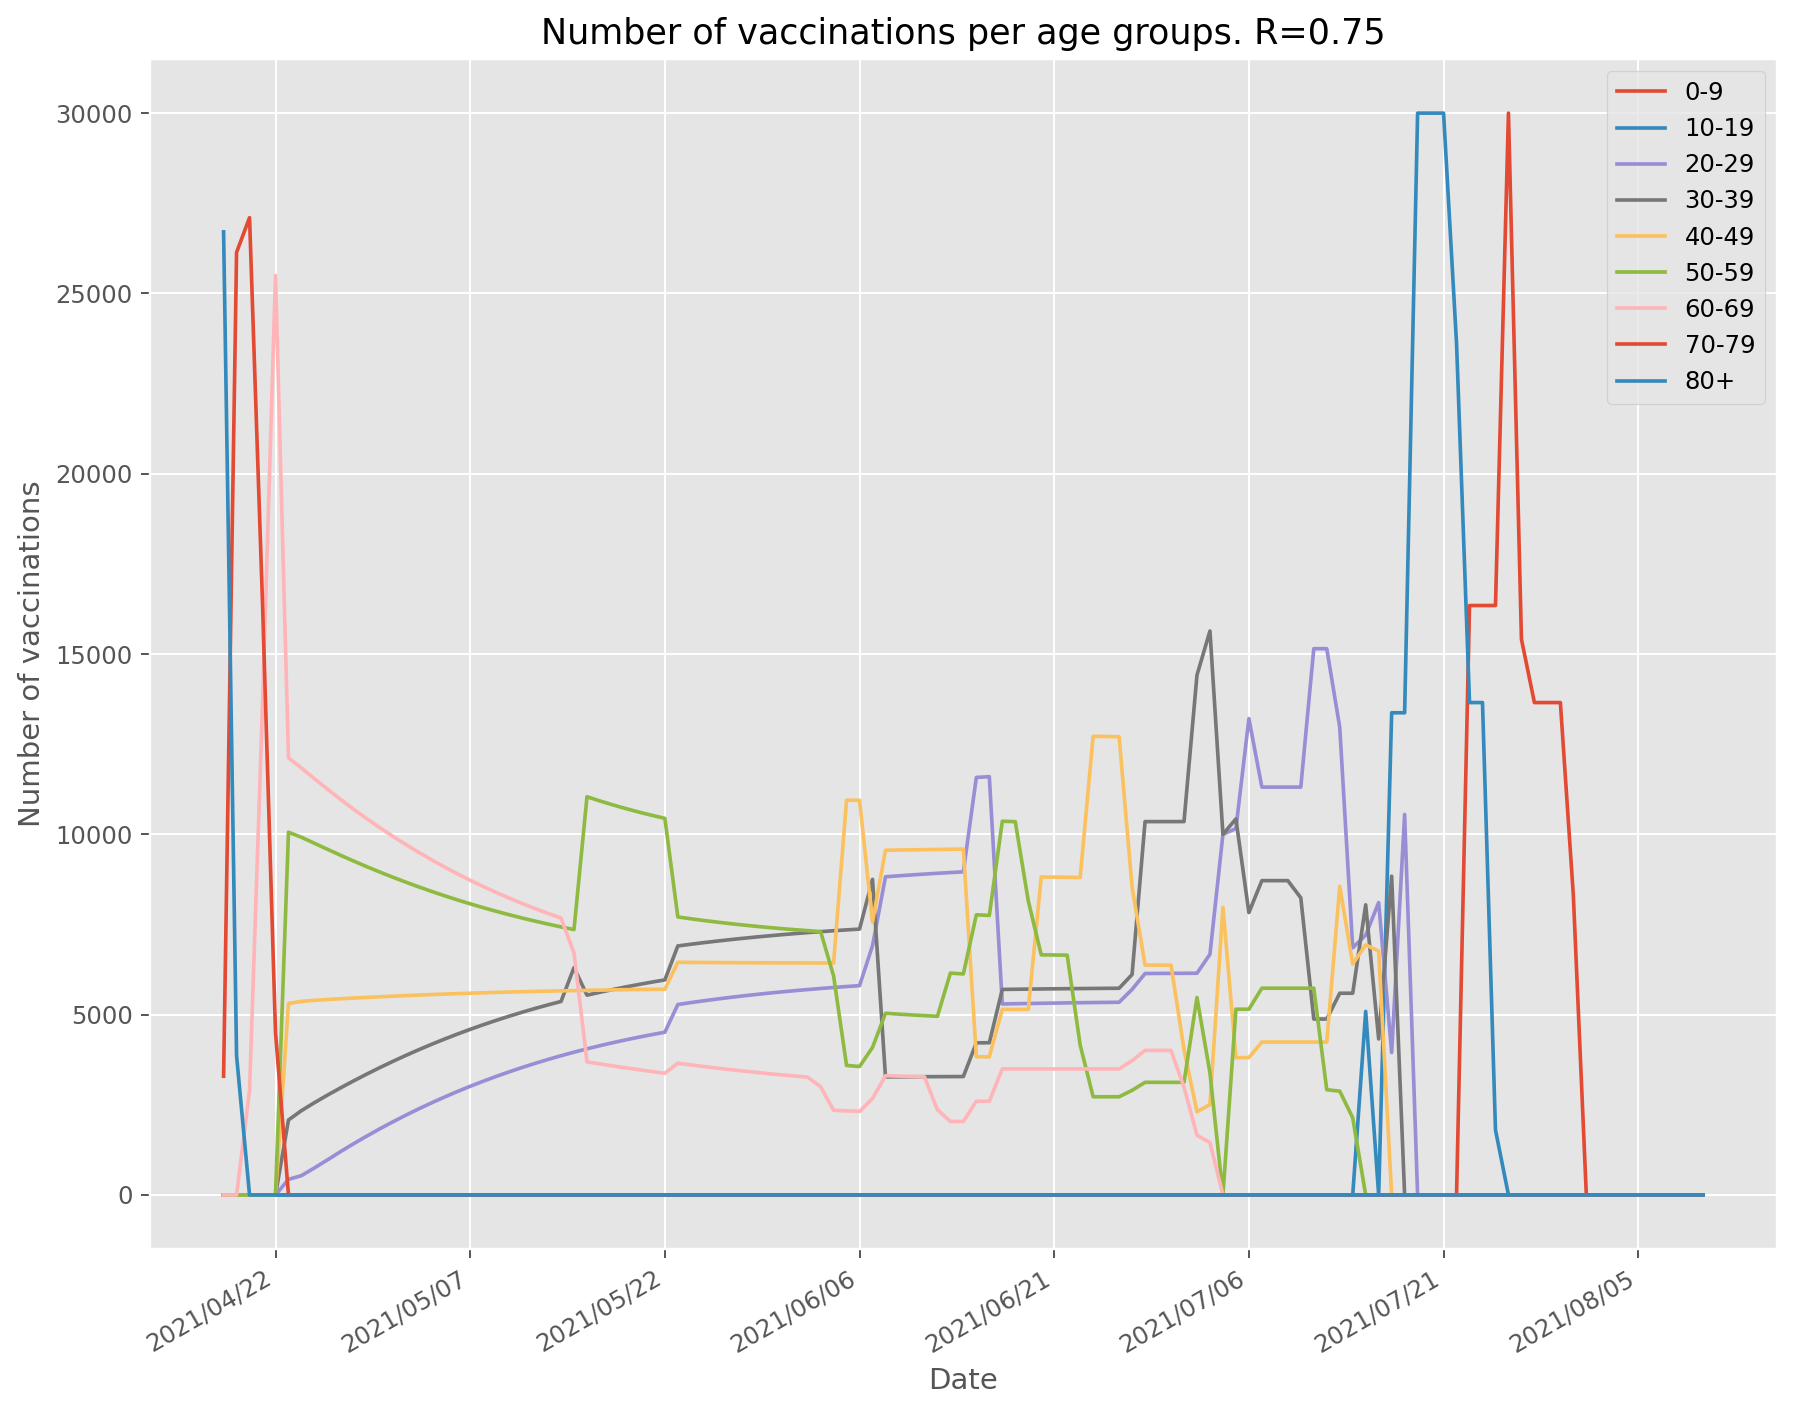

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_vaccination(ax, all_results=all_results ,r=r_experiments[0],
                      metric='vaccinations', t0=t0, T=T, plot='age groups', labels=age_labels)

fig.autofmt_xdate()

# R = 1.0

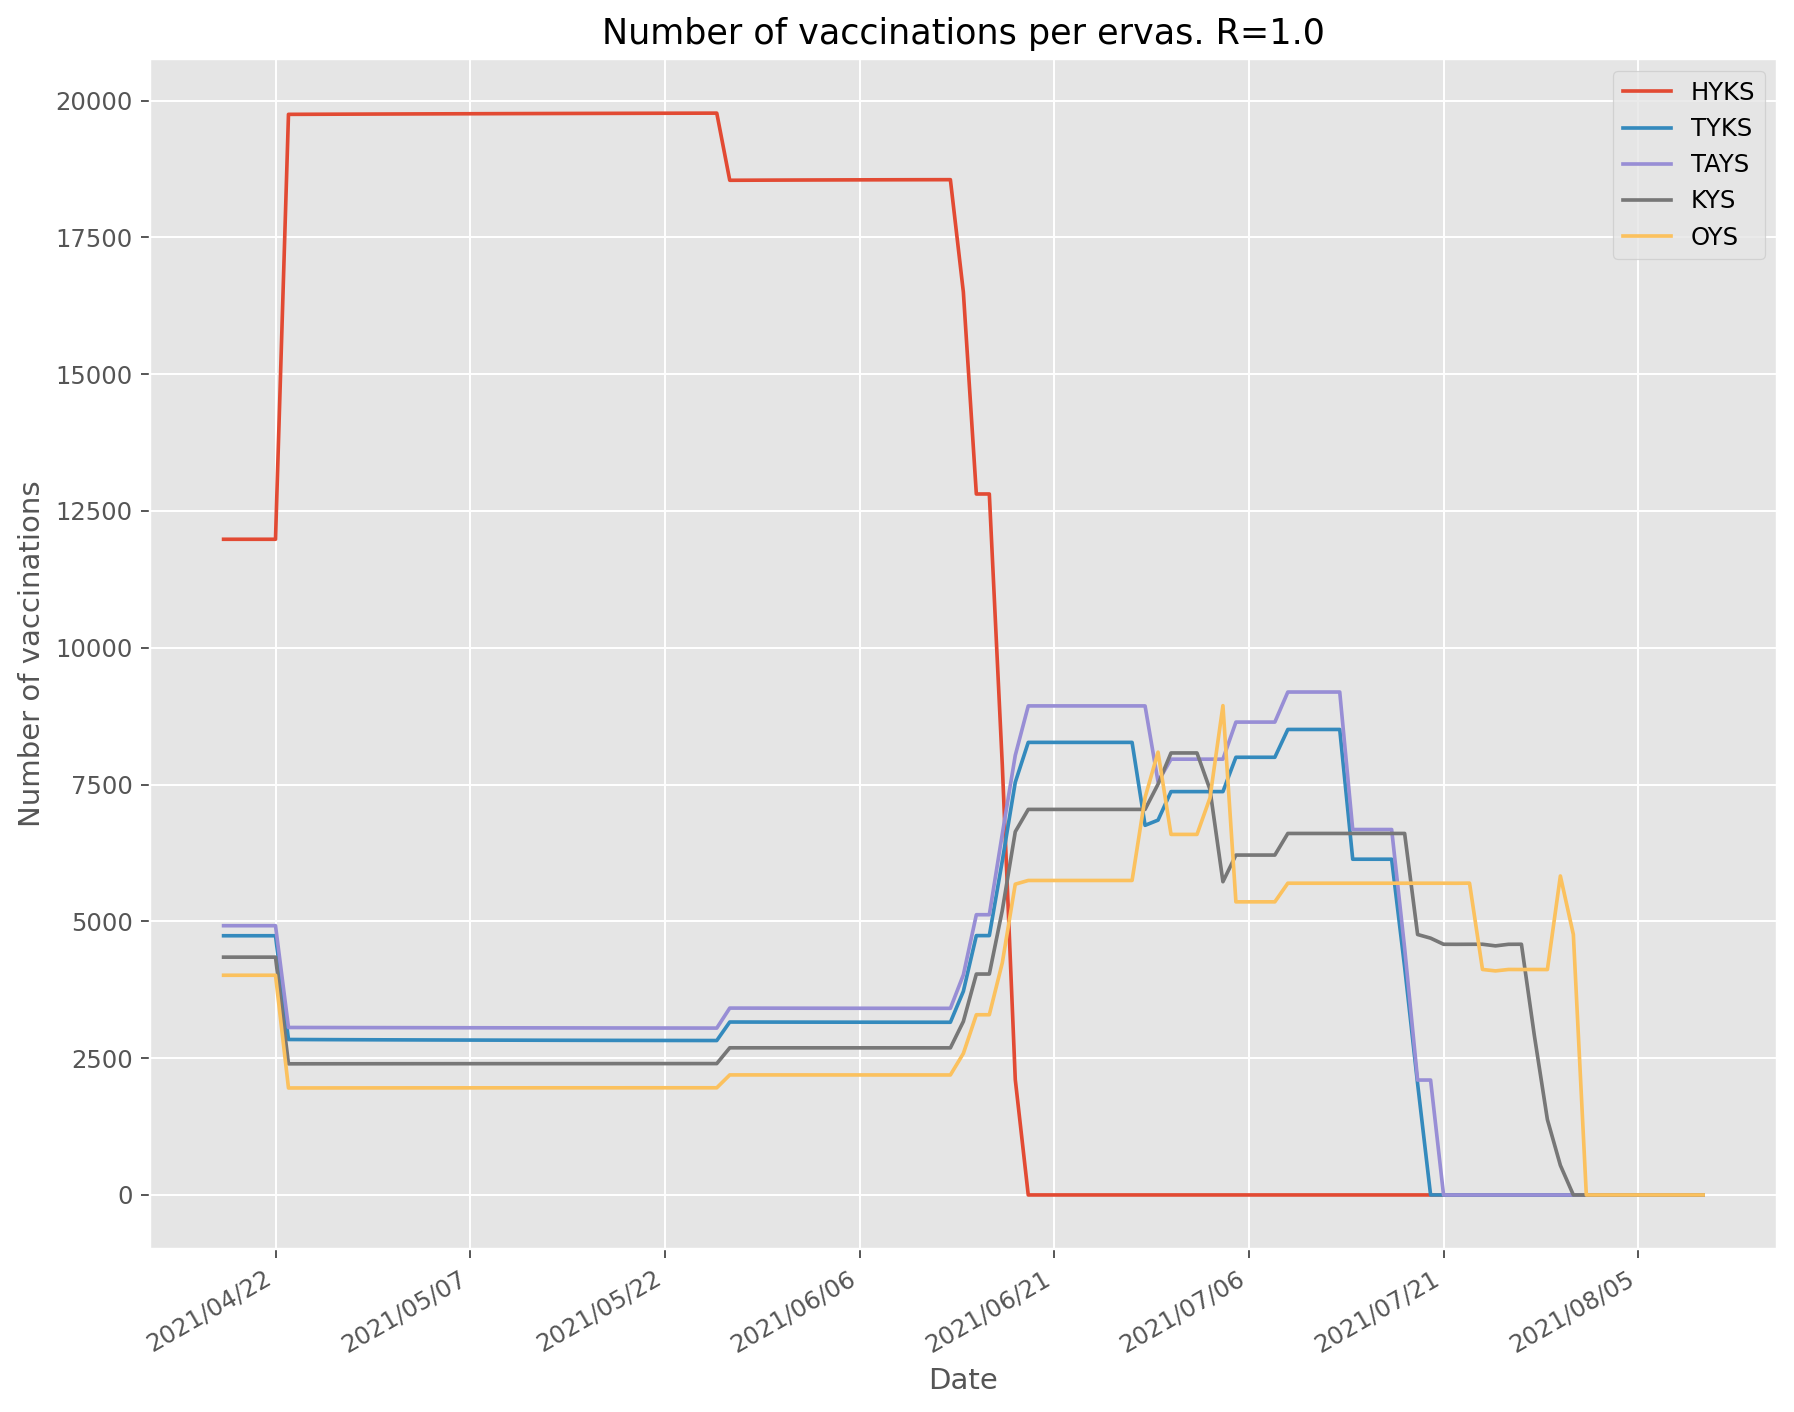

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_vaccination(ax, all_results=all_results ,r=r_experiments[1],
                      metric='vaccinations', t0=t0, T=T, plot='ervas', labels=ervas_labels)

fig.autofmt_xdate()

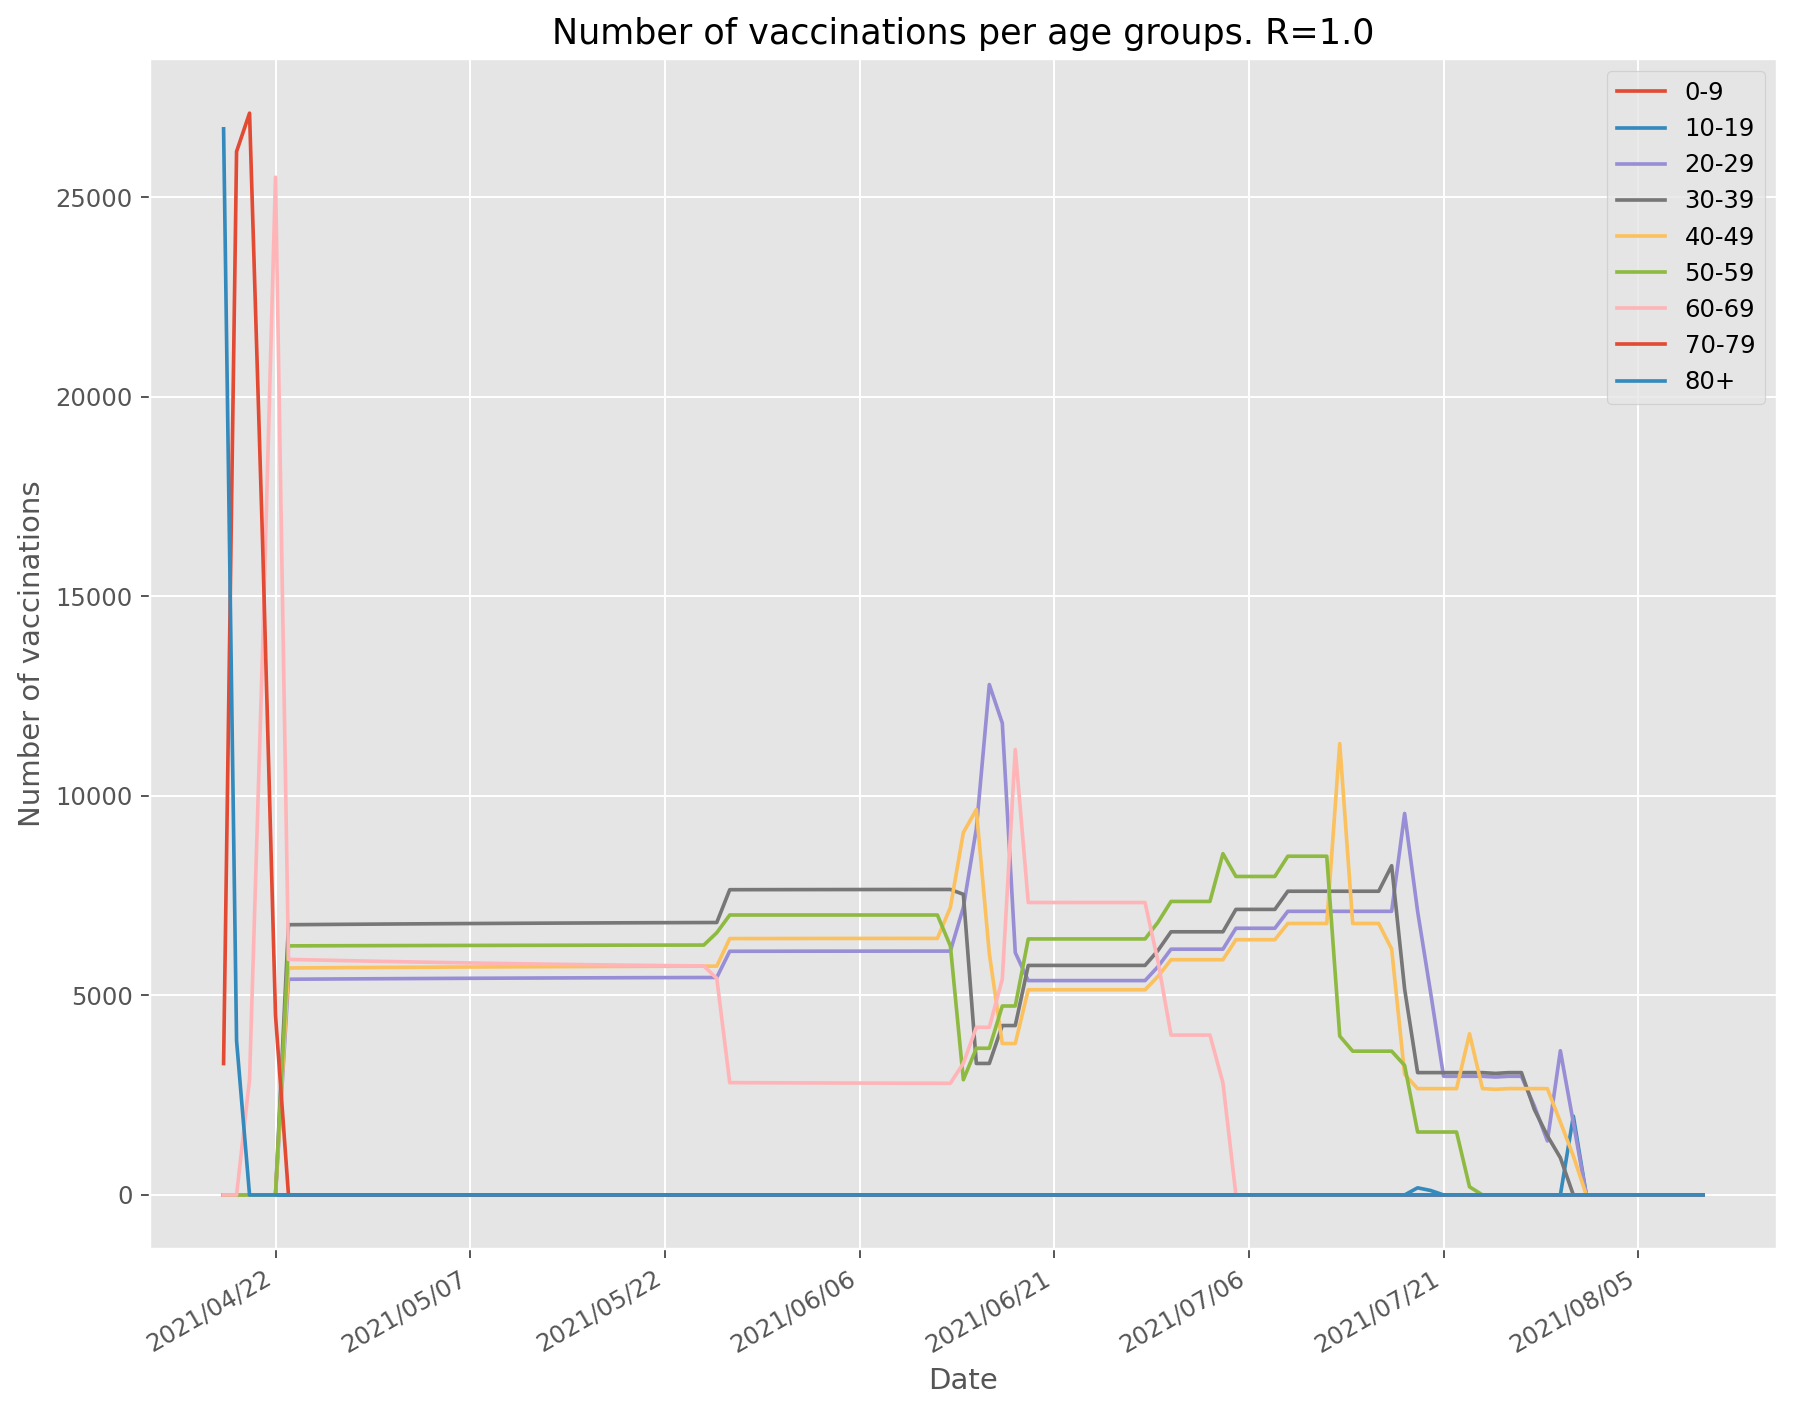

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_vaccination(ax, all_results=all_results ,r=r_experiments[1],
                      metric='vaccinations', t0=t0, T=T, plot='age groups', labels=age_labels)

fig.autofmt_xdate()

# R = 1.25

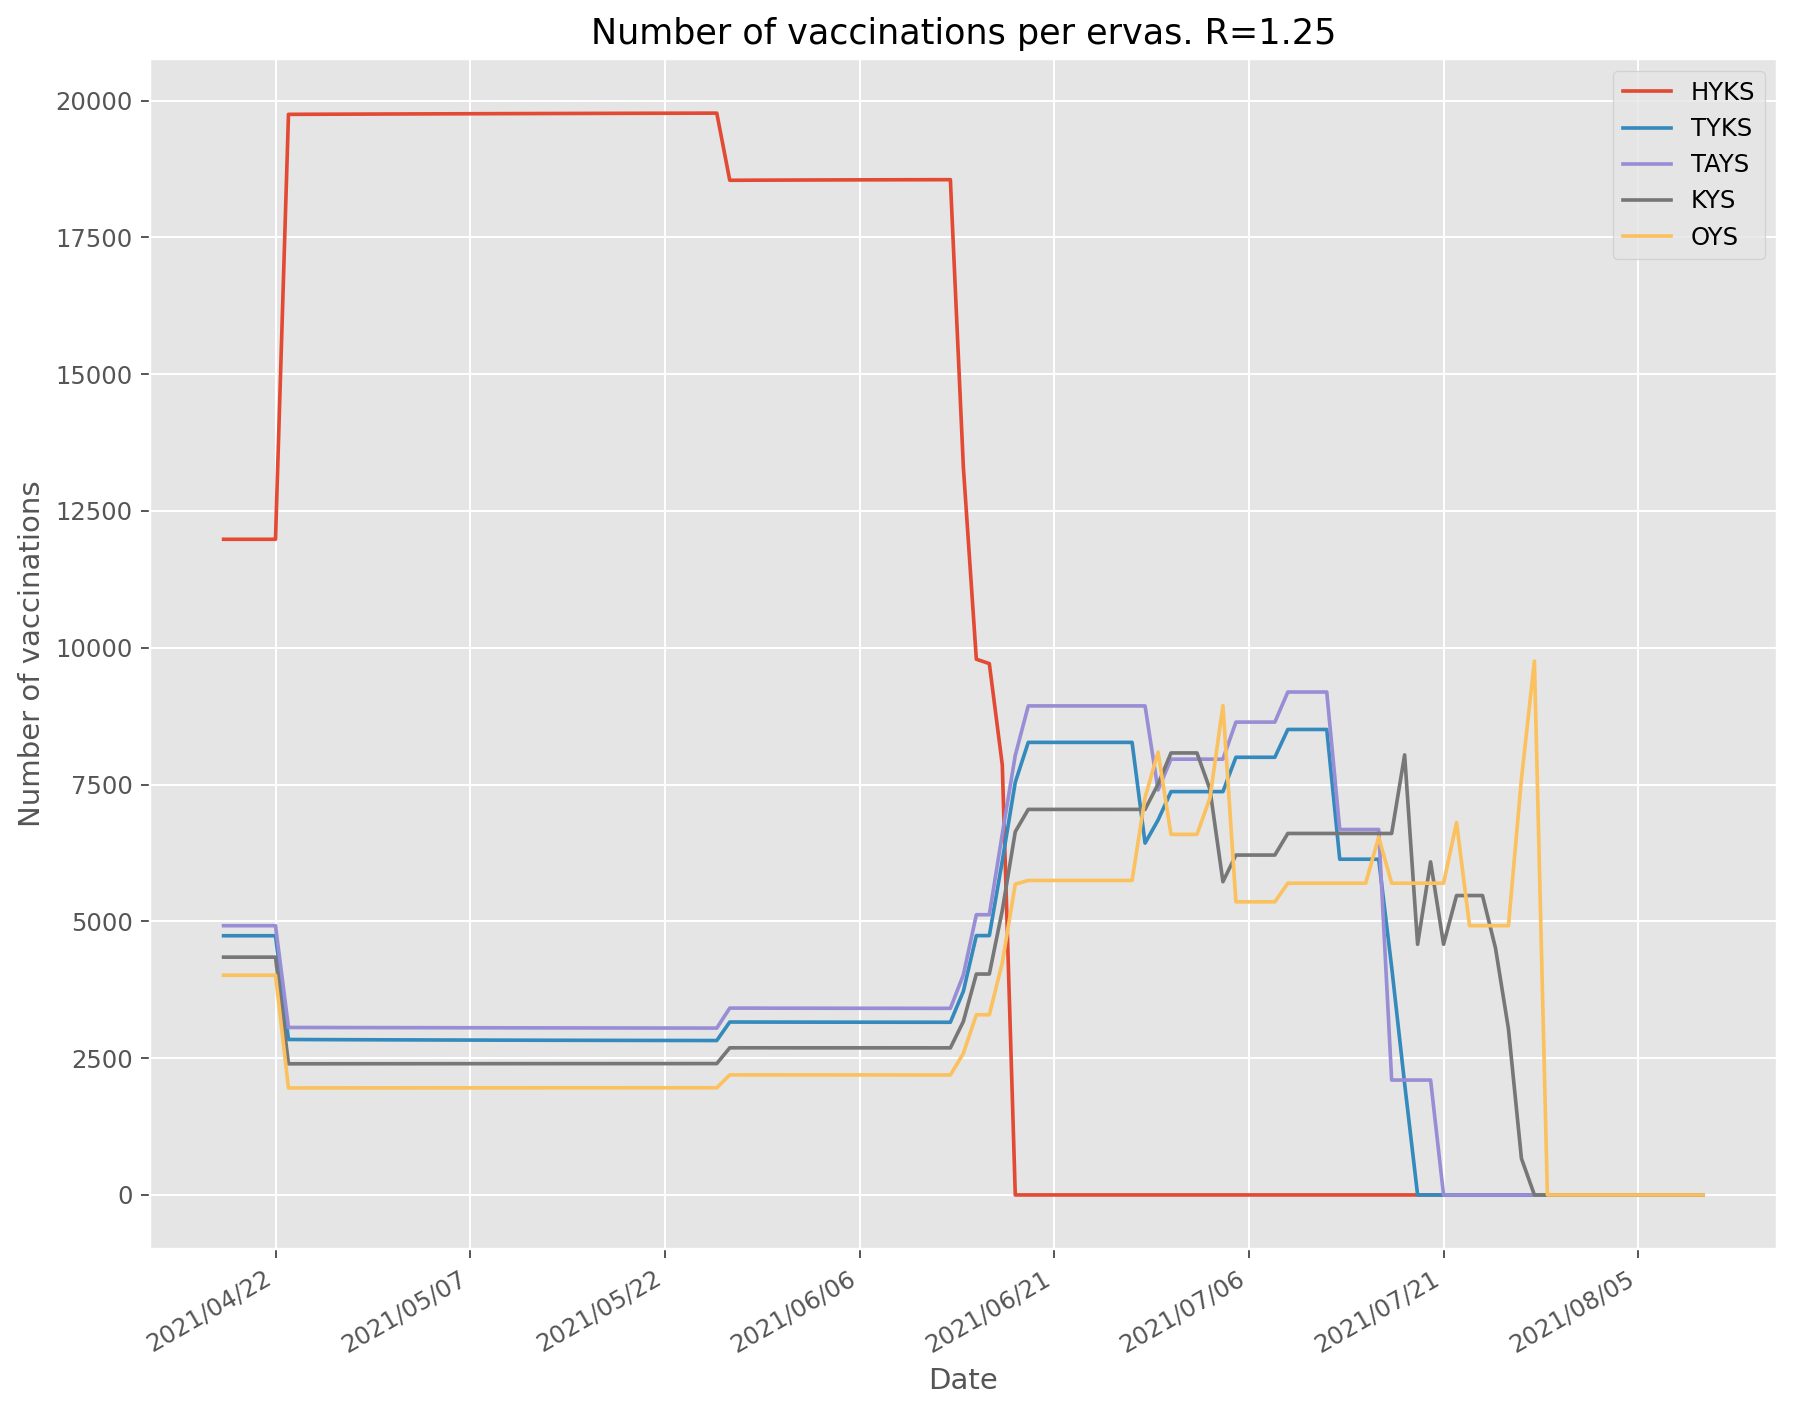

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_vaccination(ax, all_results=all_results ,r=r_experiments[2],
                      metric='vaccinations', t0=t0, T=T, plot='ervas', labels=ervas_labels)

fig.autofmt_xdate()

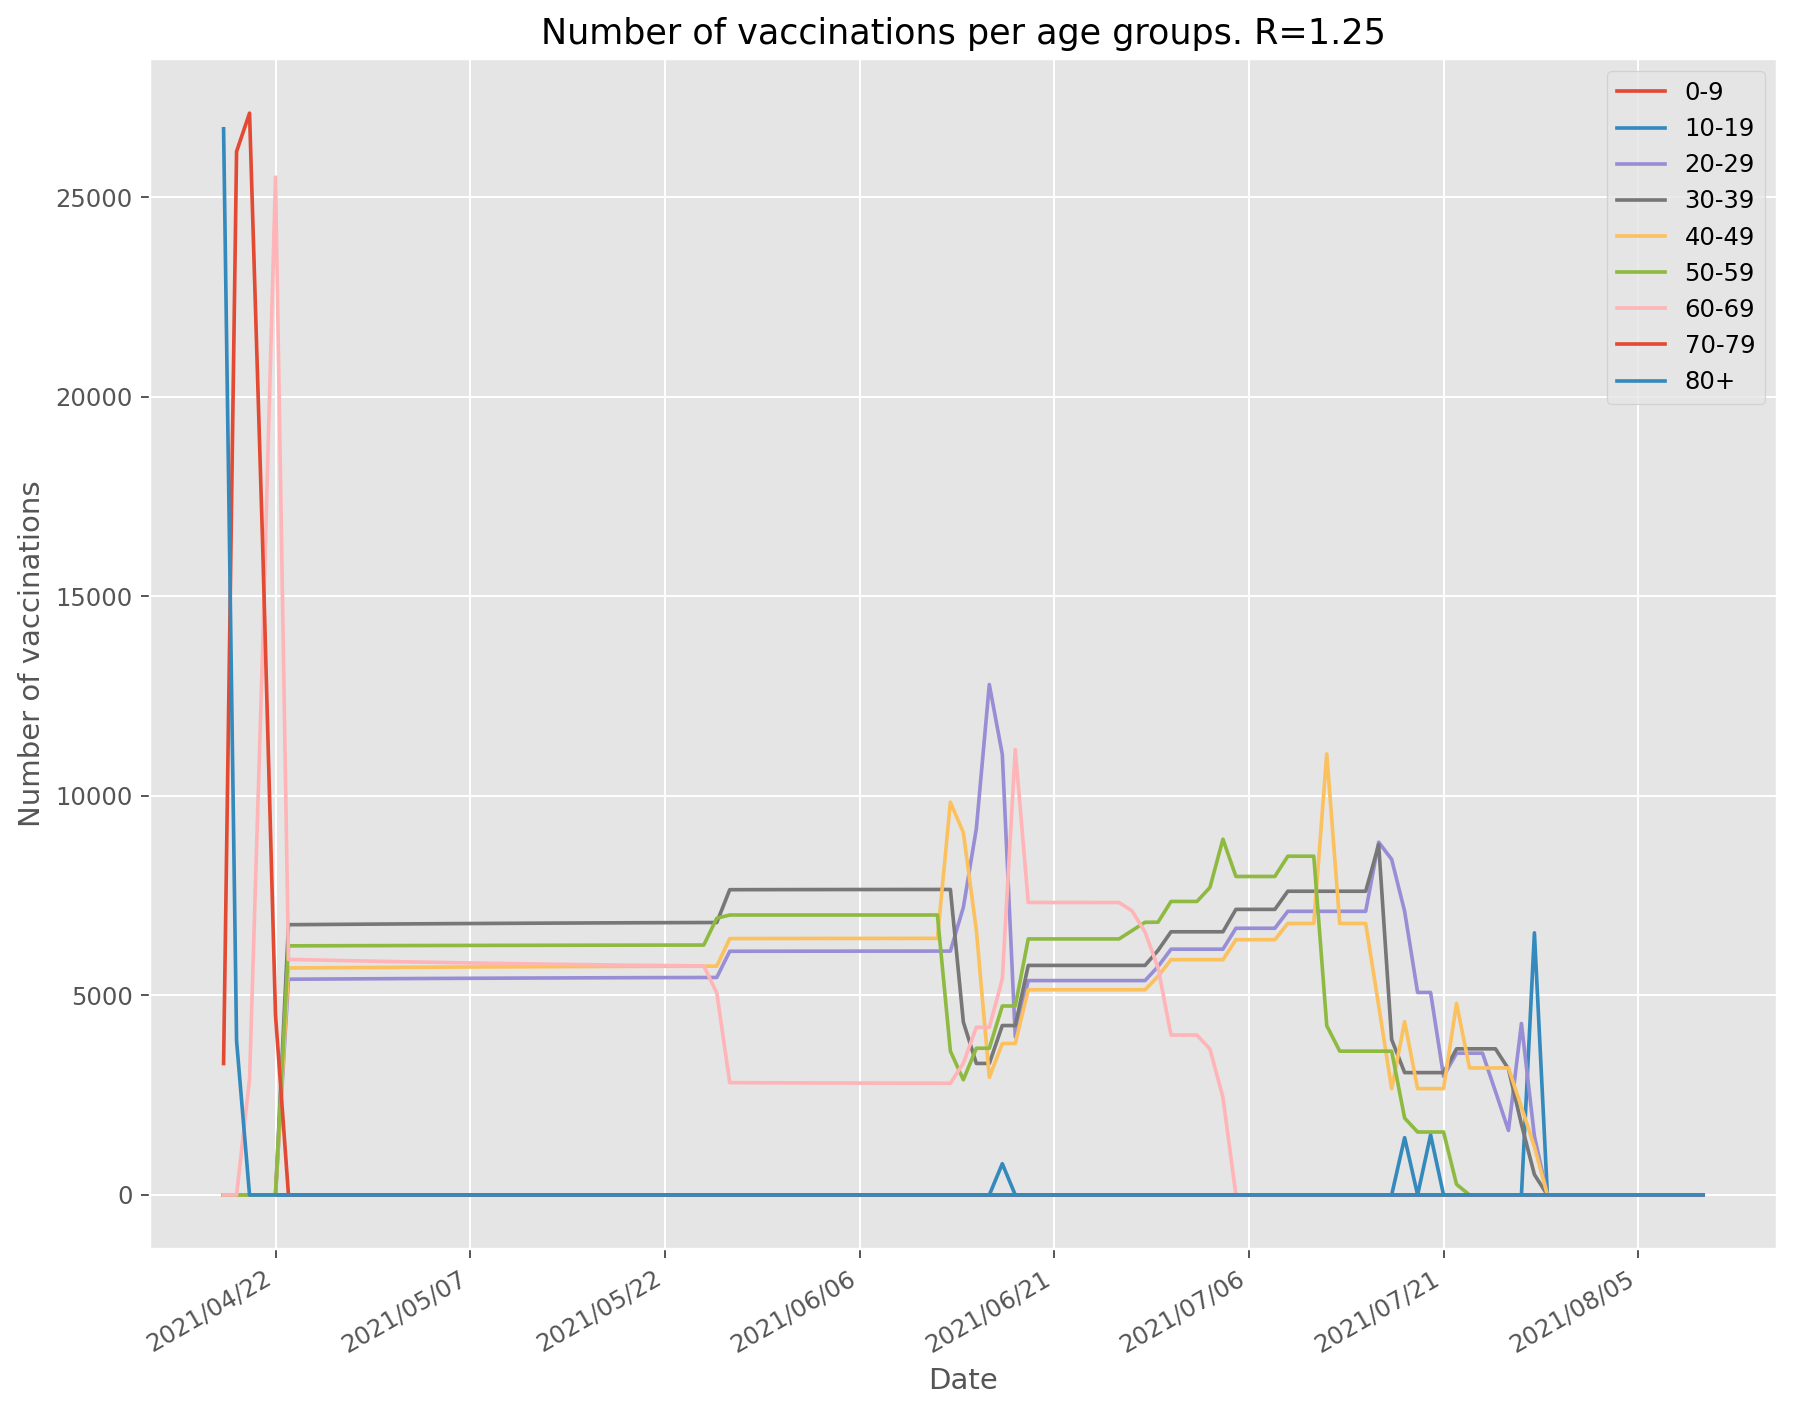

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_vaccination(ax, all_results=all_results ,r=r_experiments[2],
                      metric='vaccinations', t0=t0, T=T, plot='age groups', labels=age_labels)

fig.autofmt_xdate()

# R = 1.5

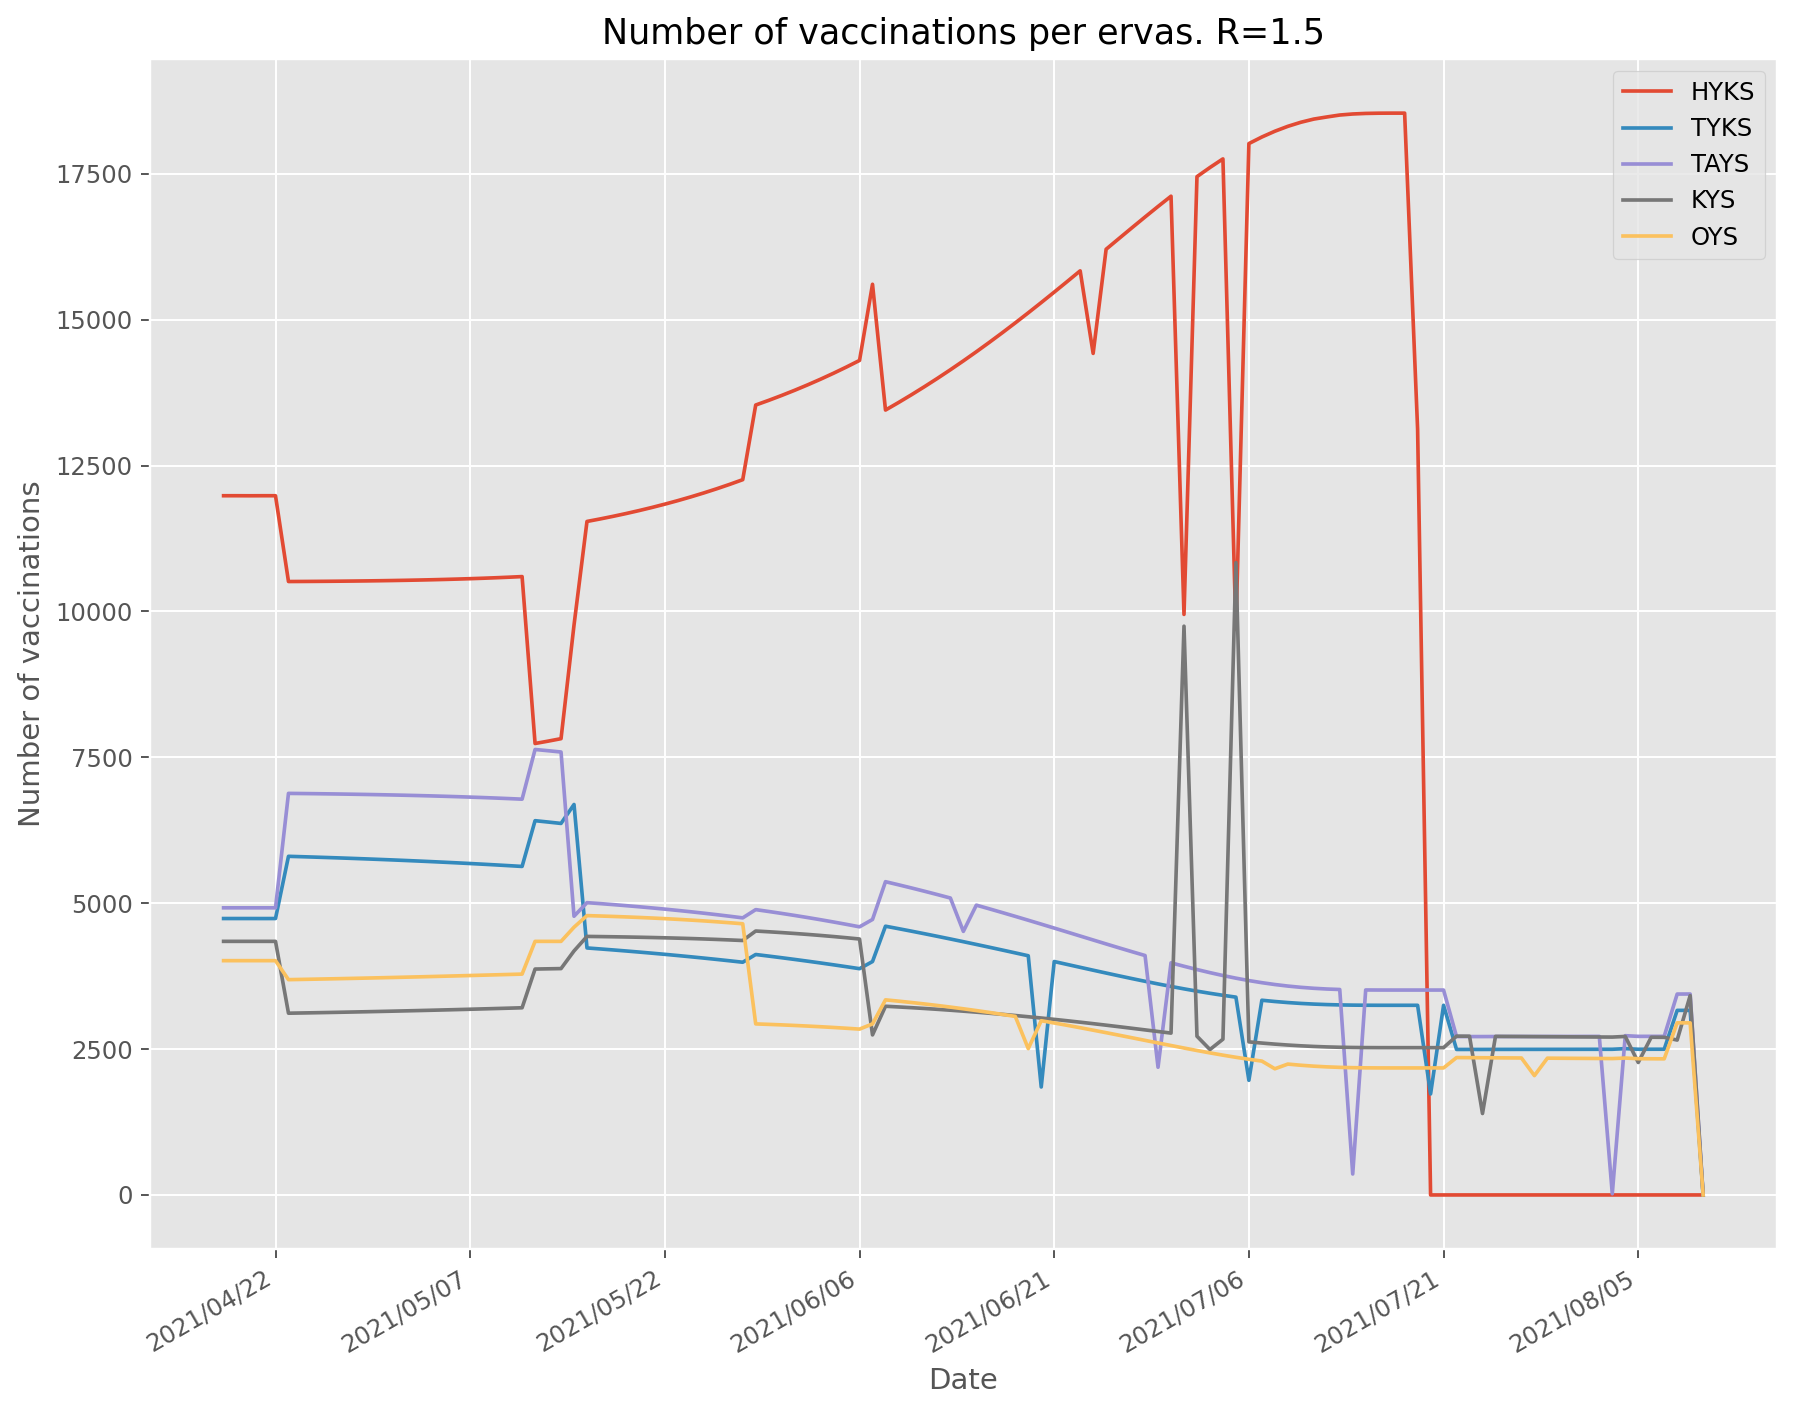

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_vaccination(ax, all_results=all_results ,r=r_experiments[3],
                      metric='vaccinations', t0=t0, T=T, plot='ervas', labels=ervas_labels)

fig.autofmt_xdate()

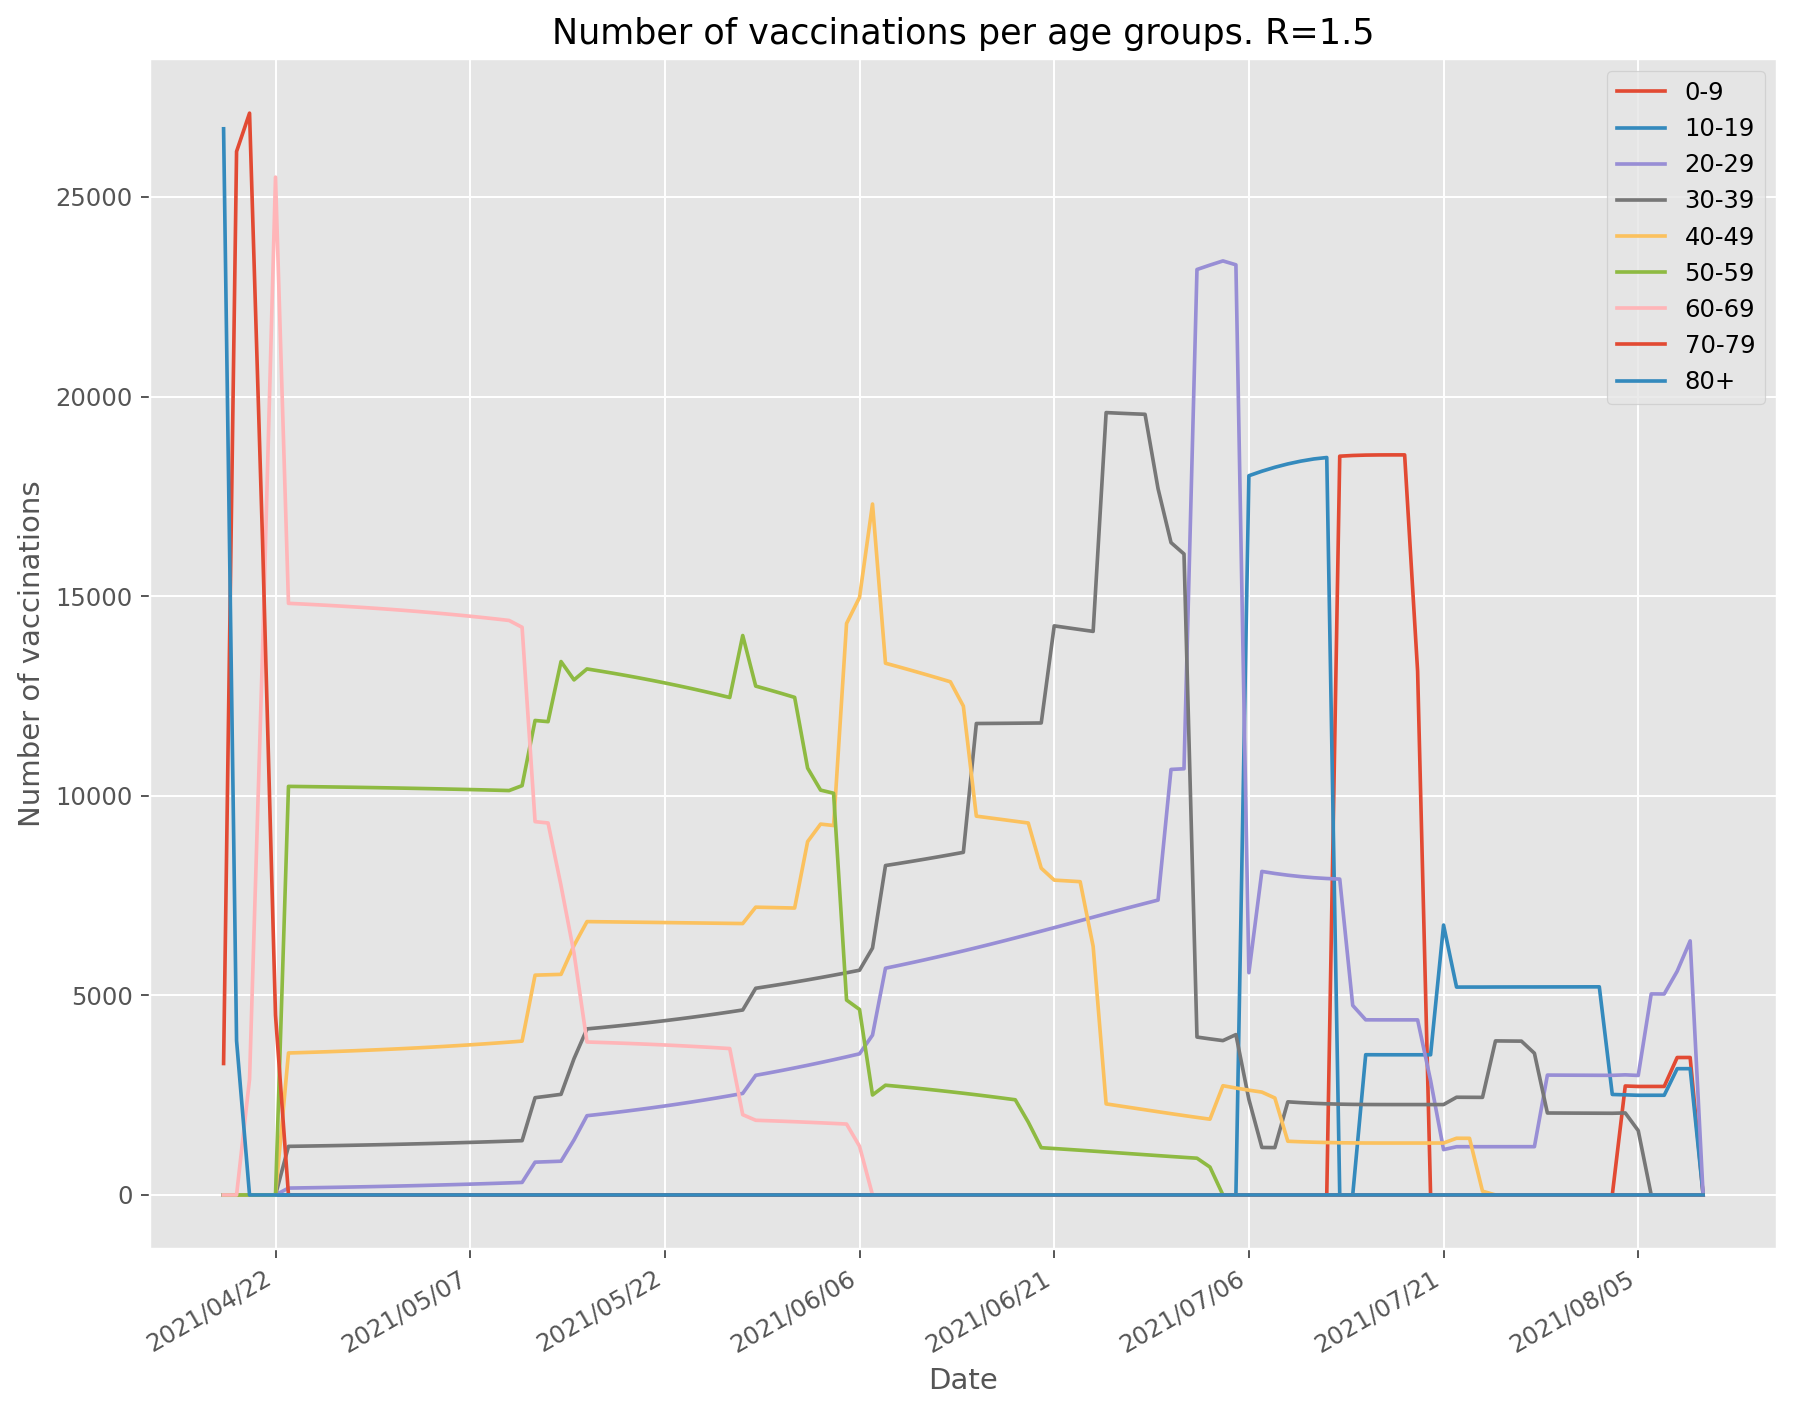

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_vaccination(ax, all_results=all_results ,r=r_experiments[3],
                      metric='vaccinations', t0=t0, T=T, plot='age groups', labels=age_labels)

fig.autofmt_xdate()